In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\gaura\OneDrive\Desktop\Zomato_Data_Analysis\Zomato-data-Analysis.csv")

In [3]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
# Data Cleaning
# Convert 'rate' column to numeric

In [5]:
def clean_rate(value):
    try:
        return float(str(value).split('/')[0])
    except:
        return np.nan

df['rate'] = df['rate'].apply(clean_rate)

In [6]:
# Check missing values
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [7]:
# Fill missing values
df.fillna({'rate': df['rate'].mean()}, inplace=True)

C:\Users\gaura\AppData\Local\Temp\ipykernel_2572\1605557094.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['online_order'], palette='coolwarm')


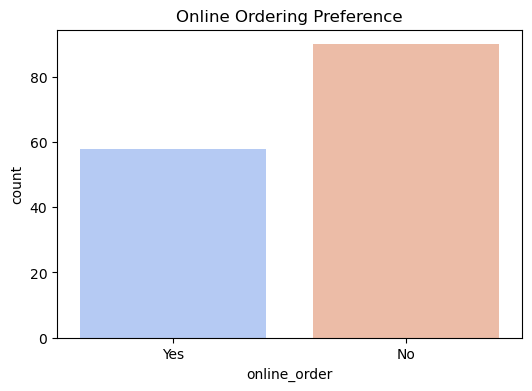

In [8]:
# ----- Analysis & Visualizations -----

# 1️ Online Order vs Dine-in Popularity
plt.figure(figsize=(6,4))
sns.countplot(x=df['online_order'], palette='coolwarm')
plt.title("Online Ordering Preference")
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_2572\1609169844.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['listed_in(type)'], order=df['listed_in(type)'].value_counts().index, palette='viridis')


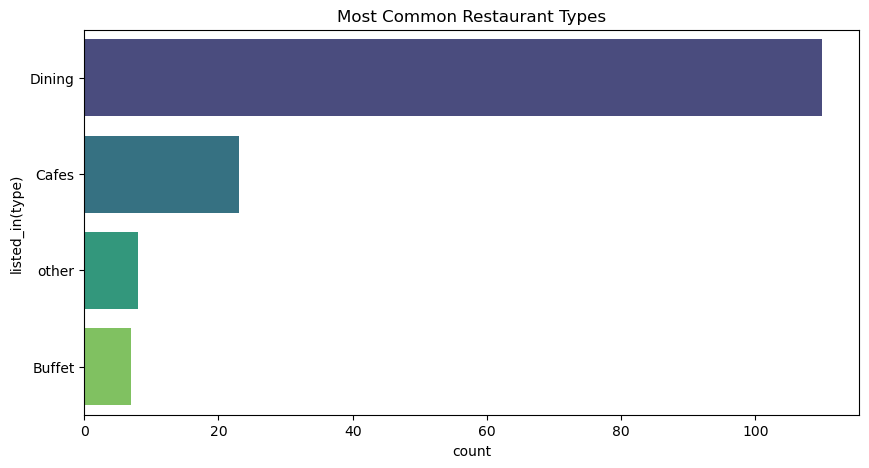

In [9]:
# 2️ Most Popular Restaurant Types
plt.figure(figsize=(10,5))
sns.countplot(y=df['listed_in(type)'], order=df['listed_in(type)'].value_counts().index, palette='viridis')
plt.title("Most Common Restaurant Types")
plt.show()


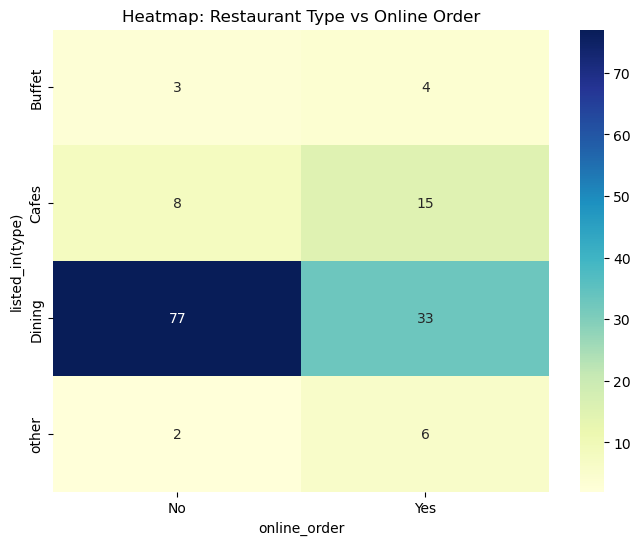

In [10]:
# 3️ Heatmap of Restaurant Types vs Online Orders
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap: Restaurant Type vs Online Order')
plt.show()

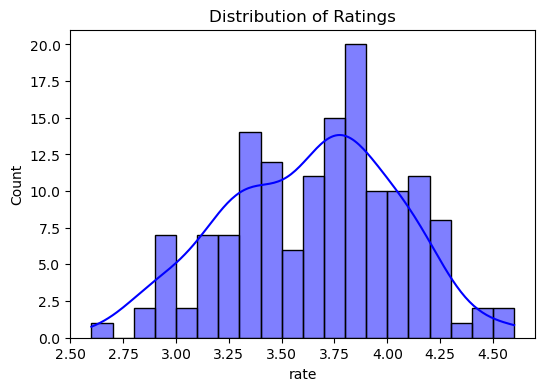

In [11]:
# 4️ Ratings Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['rate'], bins=20, kde=True, color='blue')
plt.title("Distribution of Ratings")
plt.show()

In [12]:
# 5️ Most Expensive vs Most Popular Restaurants
print("Most Expensive Restaurants:")
print(df[['name', 'approx_cost(for two people)']].sort_values(by='approx_cost(for two people)', ascending=False).head(10))



Most Expensive Restaurants:
                     name  approx_cost(for two people)
97   Ayda Persian Kitchen                          950
22        Cafe Coffee Day                          900
119         K27 - The Pub                          900
63        Jeet Restaurant                          850
48          Beijing Bites                          850
0                   Jalsa                          800
16           Catch-up-ino                          800
14        San Churro Cafe                          800
43         Domino's Pizza                          800
1          Spice Elephant                          800


In [13]:
print("Most Popular Restaurants:")
print(df[['name', 'votes']].sort_values(by='votes', ascending=False).head(10))

Most Popular Restaurants:
                  name  votes
38   Empire Restaurant   4884
86       Meghana Foods   4401
7               Onesta   2556
44              Onesta   2556
65         Kabab Magic   1720
37     Szechuan Dragon   1647
54        Roving Feast   1047
14     San Churro Cafe    918
2      San Churro Cafe    918
67  Gustoes Beer House    868
